<a href="https://colab.research.google.com/github/MrGrayCode/Tinkering-With-CNNs/blob/main/Visualising_Feature_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

CNNs work as a feature extracter where each layer in the network extracts a set of features with increasing complexity as we go deeper into the network. Visualising the features can help us understand what the network is learning from the data and how it it making the classification.

 This notebook aims to visualise the feature maps generated on a pretrained VGG11 network.

# Imports

In [1]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torchvision
from torchvision.datasets import ImageNet
from torchvision.transforms import transforms
import torchvision.models as models
import numpy as np
import random

import matplotlib.pyplot as plt
from PIL import Image

# Utils

In [2]:
def imshow(img):
    '''
    to display images
    '''
    npimg = img.numpy()
    plt.imshow(npimg.transpose(1,2,0))
    plt.axis('off')

In [3]:
def showfeatures(featuregrid):
    '''
    to display feature maps
    '''
    featuregrid = featuregrid.numpy()
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(featuregrid, cmap='gray')
    plt.axis('off')

In [4]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

# Load the model

We will be visualising the feature maps generated on a pretrained VGG11 model. 

In [5]:
net = models.vgg11(pretrained=True)

In [6]:
# display the architecture of the model
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

## Hook to get activations

In [7]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

## Register hooks

In [8]:
'''
Attach hooks to the layer preceeding each max pool layer
'''
net.features[1].register_forward_hook(get_activation('conv1'))
net.features[4].register_forward_hook(get_activation('conv2'))
net.features[9].register_forward_hook(get_activation('conv3'))
net.features[14].register_forward_hook(get_activation('conv4'))
net.features[19].register_forward_hook(get_activation('conv5'))

# Visualise Feature Maps 

## Test Image 1

["A cute Dog 4" by Chen Vision is licensed under CC BY-NC 2.0](https://search.creativecommons.org/photos/a3565050-50dc-4a57-8986-dc6bc3d8af48)

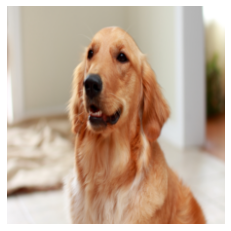

In [9]:
img = Image.open('dog.jpg')
img_tensor = transform(img)
input_image = img_tensor.view(1,3,224,224)
imshow(torchvision.utils.make_grid(input_image.cpu()))

### Forward pass and get feature maps

In [10]:
net.eval()
with torch.no_grad():
    input_image = input_image
    _ = net(input_image)

### Visualize feature map at conv1

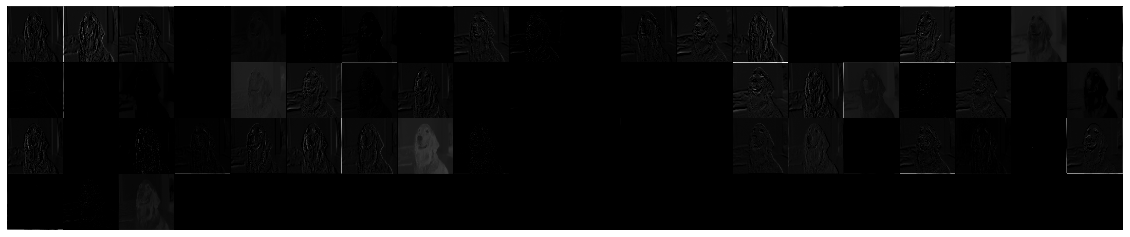

In [11]:
fm = activation['conv1']
fm = fm.permute(1,0,2,3)
showfeatures(torchvision.utils.make_grid(fm.cpu(),20)[0])

The first feature map shows images very close to the input image itself and the filters seem to activate the image edges

### Visualize feature map at conv2

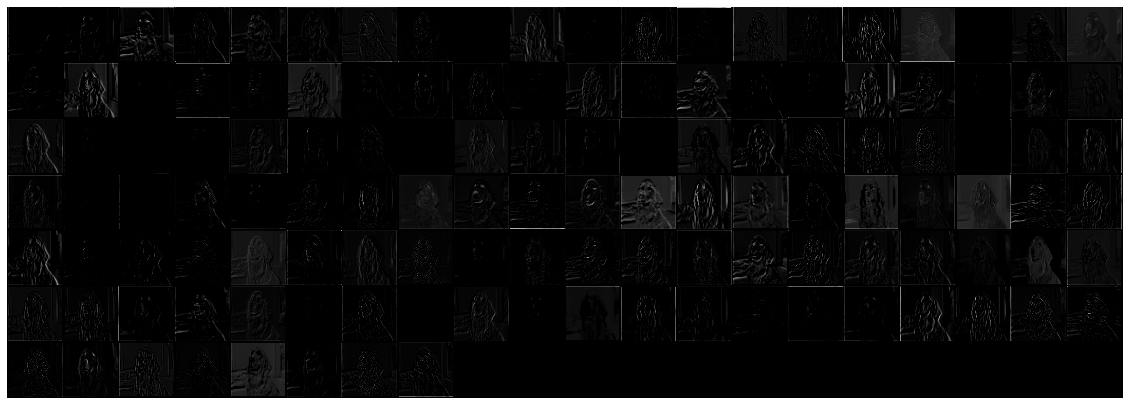

In [12]:
fm = activation['conv2']
fm = fm.permute(1,0,2,3)
showfeatures(torchvision.utils.make_grid(fm, 20)[0])

In these feature maps we can see that we get more specific parts of the dog activated. Like in the center we can see the eyes and nose regions of the dog gettting activated.

Likewise as we go deeper into the network we get more complex feature maps which get difficult to interpret.

Also as the deeper layers have too many feature maps to plot the following cells only plot the first 40 of those feature maps

### Visualize feature map at conv3

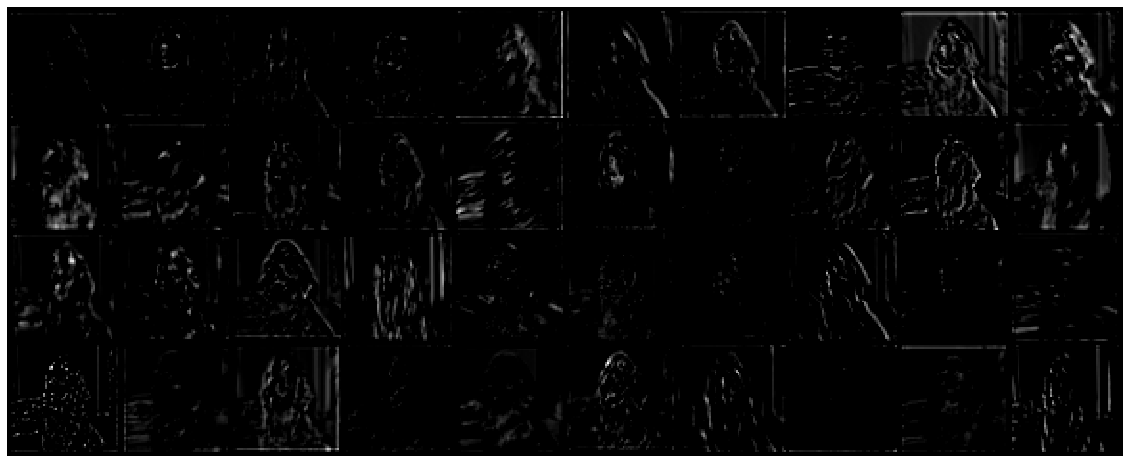

In [13]:
fm = activation['conv3']
fm = fm.permute(1,0,2,3)
showfeatures(torchvision.utils.make_grid(fm.cpu()[:40], 10)[0])

### Visualize feature map at conv4

torch.Size([512, 1, 28, 28])


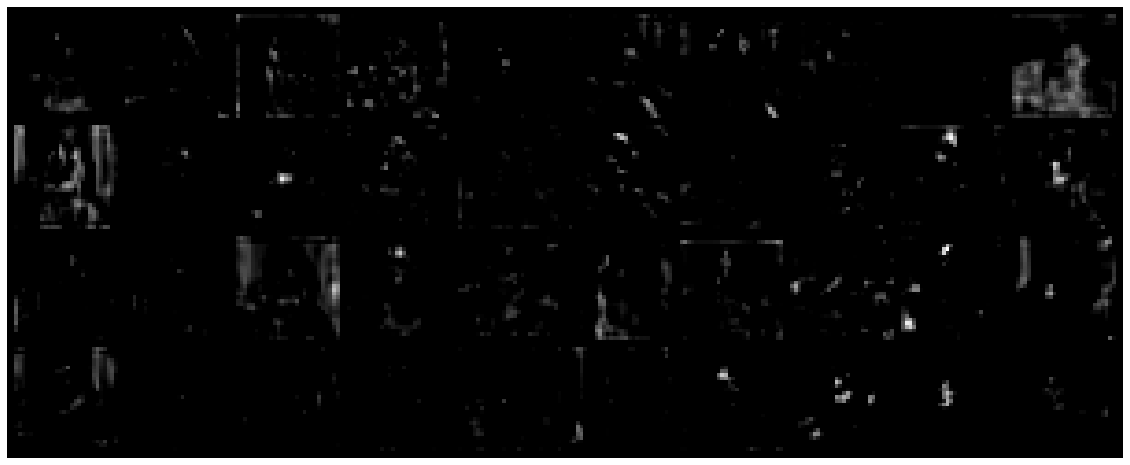

In [14]:
fm = activation['conv4']
fm = fm.permute(1,0,2,3)
print(fm.shape)
showfeatures(torchvision.utils.make_grid(fm[:40], 10)[0])

### Visualize feature map at conv5

torch.Size([512, 1, 14, 14])


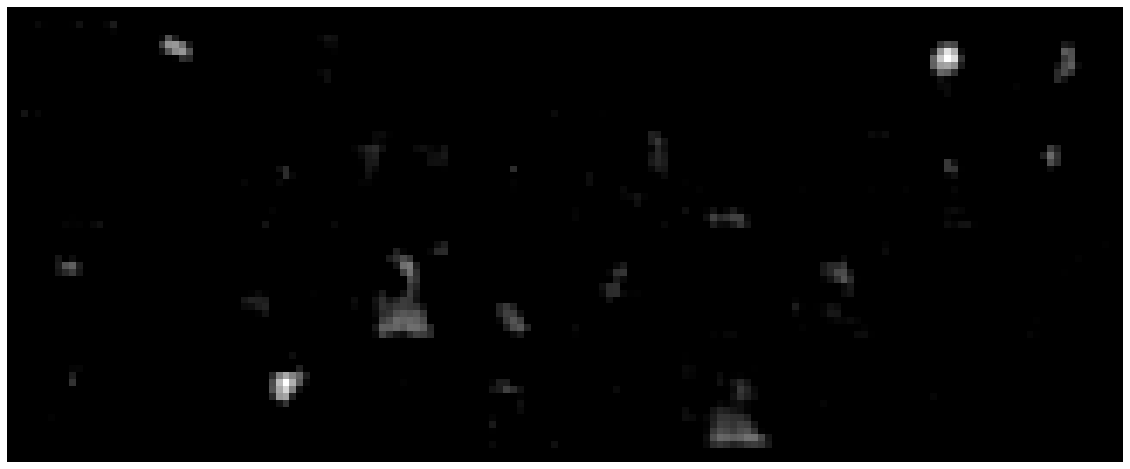

In [15]:
fm = activation['conv5']
fm = fm.permute(1,0,2,3)
print(fm.shape)
showfeatures(torchvision.utils.make_grid(fm[:40], 10)[0])

## Test Image 2

["Shelby GR-1 concept car" by Sherlock77 (James) is licensed under CC BY-NC-ND 2.0](https://search.creativecommons.org/photos/0cda9152-8e73-419b-b45c-47851dd6ddbb)

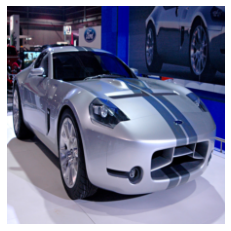

In [16]:
img = Image.open('car.jpg')
img_tensor = transform(img)
input_image = img_tensor.view(1,3,224,224)
imshow(torchvision.utils.make_grid(input_image.cpu()))

### Forward pass and get feature maps

In [17]:
net.eval()
with torch.no_grad():
    input_image = input_image
    _ = net(input_image)

### Visualize feature map at conv1

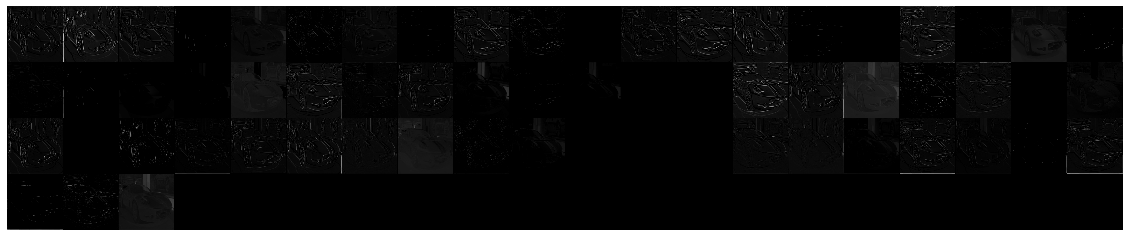

In [18]:
fm = activation['conv1']
fm = fm.permute(1,0,2,3)
showfeatures(torchvision.utils.make_grid(fm.cpu(),20)[0])

Again we can see that the first layer seems to extract the edge features from the input image

### Visualize feature map at conv2

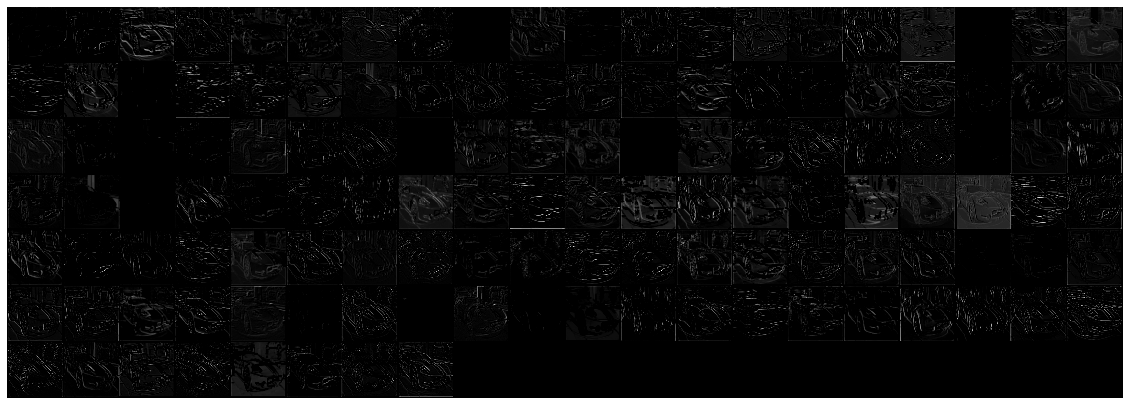

In [19]:
fm = activation['conv2']
fm = fm.permute(1,0,2,3)
showfeatures(torchvision.utils.make_grid(fm, 20)[0])

In this layer we can see more complex features of the car like the hood, wheels and head lamps getting activated.

### Visualize feature map at conv3

torch.Size([256, 1, 56, 56])


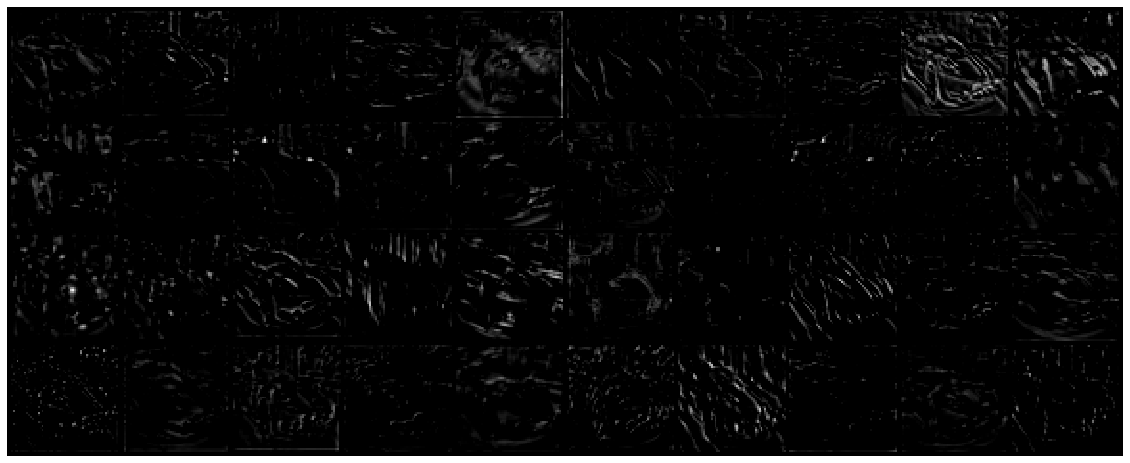

In [20]:
fm = activation['conv3']
fm = fm.permute(1,0,2,3)
print(fm.shape)
showfeatures(torchvision.utils.make_grid(fm.cpu()[:40], 10)[0])

### Visualize feature map at conv4

torch.Size([512, 1, 28, 28])


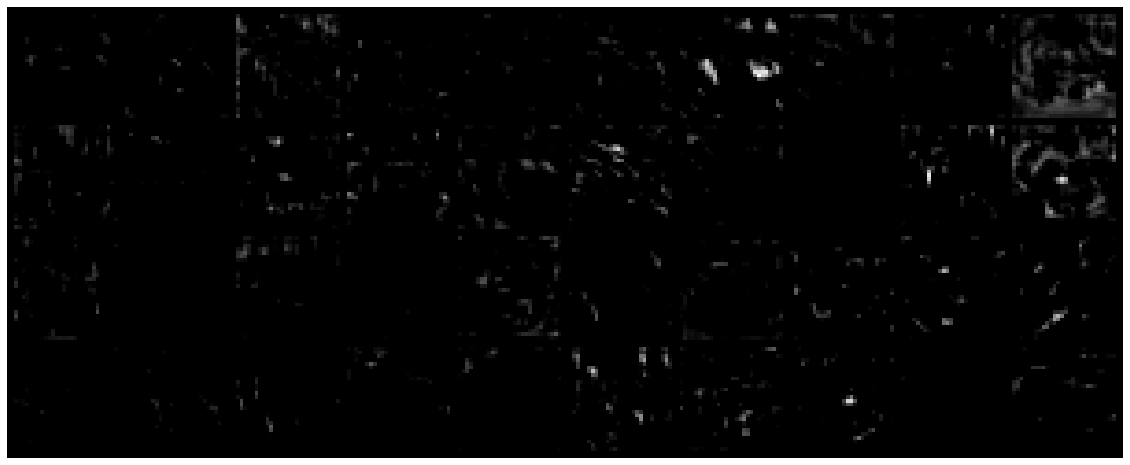

In [21]:
fm = activation['conv4']
fm = fm.permute(1,0,2,3)
print(fm.shape)
showfeatures(torchvision.utils.make_grid(fm[:40], 10)[0])

### Visualize feature map at conv5

torch.Size([512, 1, 14, 14])


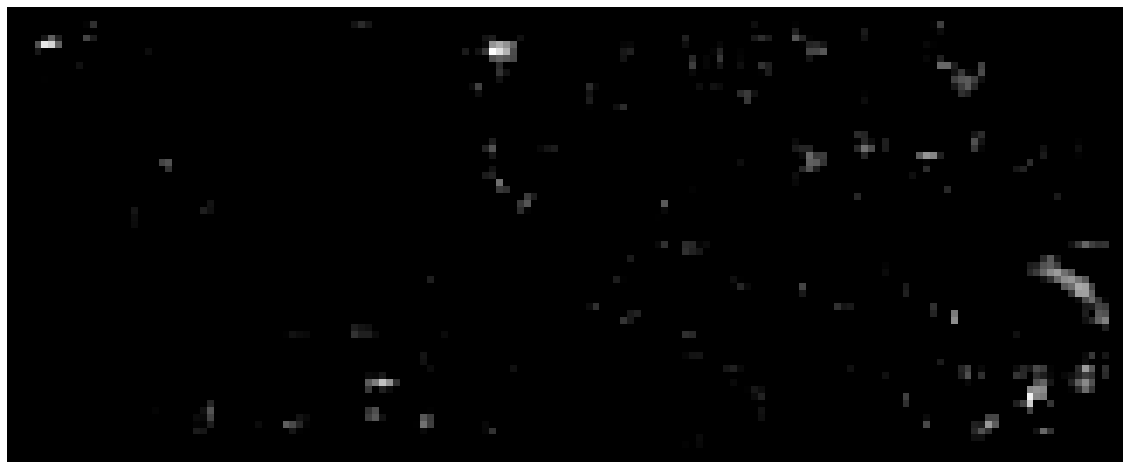

In [22]:
fm = activation['conv5']
fm = fm.permute(1,0,2,3)
print(fm.shape)
showfeatures(torchvision.utils.make_grid(fm[:40], 10)[0])